<a href="https://colab.research.google.com/github/LaDiosaNegra/Kristal_SiliconAccra/blob/main/ImportExport2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the Excel file into an ExcelFile object
xls = pd.ExcelFile('EXPORTIMPORT PRODUCTS.xlsx')

# Get names of all sheets in the file
sheet_names = xls.sheet_names

# Dictionary to store dataframes
df_dict = {}

# Read each sheet into a separate dataframe
for sheet in sheet_names:
    df_dict[sheet] = pd.read_excel(xls, sheet_name=sheet)


df_dict


{'EXPORT 2014':     TRADE EXPORT FOR 2014                                         Unnamed: 1  \
 0                 HS CODE                                   ITEM DESCRIPTION   
 1              2709000000     Petroleum oils and oils obtained from bitum...   
 2              7108131000                                       Gold bullion   
 3              1801001100            Cocoa beans, superior quality raw beans   
 4              7108120000     Unwrought gold (incl. gold plated with plat...   
 ..                    ...                                                ...   
 96             1106209900                           Other, not Cocoyam flour   
 97             7001000000     Cullet and other waste and scrap of glass; ...   
 98             3602009000                          Other prepared explosives   
 99             3917231000     Of polymers of vinyl chloride for water supply   
 100            4409100000     Coniferous wood, continuously shaped along ...   
 
           

In [2]:
# list the names of the dataframe
sheet_names

['EXPORT 2014', 'IMPORT 2014', 'EXPORT 2015', 'IMPORT 2015']

In [3]:
# Let's rename the columns of each DataFrame in df_dict for better readability and consistency.

renamed_df_dict = {}

for sheet, df in df_dict.items():
    # The first row contains the actual column names.
    # Let's extract them and apply them to the DataFrame.
    columns = df.iloc[0]

    # Remove the first row (now that we stored the column names)
    df = df.iloc[1:]
    df.columns = columns

    # Remove leading/trailing whitespaces from column names
    df.columns = df.columns.str.strip()

    # Rename columns
    df = df.rename(columns={"HS CODE": "HS_CODE", "ITEM DESCRIPTION": "ITEM_DESCRIPTION", "CUSTOM VALUE (GHS)": "CUSTOM_VALUE_GHS", "NETWEIGHT (KGs)": "NETWEIGHT_KGs"})

    # Store the updated DataFrame back in the dictionary
    renamed_df_dict[sheet] = df

# String representation of the renamed_df_dict just for checking the result
str(renamed_df_dict)


"{'EXPORT 2014': 0          HS_CODE                                   ITEM_DESCRIPTION  \\\n1       2709000000     Petroleum oils and oils obtained from bitum...   \n2       7108131000                                       Gold bullion   \n3       1801001100            Cocoa beans, superior quality raw beans   \n4       7108120000     Unwrought gold (incl. gold plated with plat...   \n5       1513290000     Palm kernel or babassu oil (excl. crude) an...   \n..             ...                                                ...   \n96      1106209900                           Other, not Cocoyam flour   \n97      7001000000     Cullet and other waste and scrap of glass; ...   \n98      3602009000                          Other prepared explosives   \n99      3917231000     Of polymers of vinyl chloride for water supply   \n100     4409100000     Coniferous wood, continuously shaped along ...   \n\n0      CUSTOM_VALUE_GHS  NETWEIGHT_KGs  \n1    12807117405.280001  5083270948.07  \n2    124

In [4]:
# print all dataframes stored in renamed_dict

for sheet_name, df in renamed_df_dict.items():
  print(f"Dataframe name : {sheet_name}")
  print(df)

Dataframe name : EXPORT 2014
0          HS_CODE                                   ITEM_DESCRIPTION  \
1       2709000000     Petroleum oils and oils obtained from bitum...   
2       7108131000                                       Gold bullion   
3       1801001100            Cocoa beans, superior quality raw beans   
4       7108120000     Unwrought gold (incl. gold plated with plat...   
5       1513290000     Palm kernel or babassu oil (excl. crude) an...   
..             ...                                                ...   
96      1106209900                           Other, not Cocoyam flour   
97      7001000000     Cullet and other waste and scrap of glass; ...   
98      3602009000                          Other prepared explosives   
99      3917231000     Of polymers of vinyl chloride for water supply   
100     4409100000     Coniferous wood, continuously shaped along ...   

0      CUSTOM_VALUE_GHS  NETWEIGHT_KGs  
1    12807117405.280001  5083270948.07  
2    1241676

In [5]:
# check for missing values and duplicates

results ={}

for sheet_name, df in renamed_df_dict.items():
  # check for duplicates
  duplicates = df.duplicated().sum()

  # check for missing values
  missing = df.isnull().sum().sum()

  results[sheet_name] = {'duplicates': duplicates, 'missing_values': missing }

results



{'EXPORT 2014': {'duplicates': 0, 'missing_values': 0},
 'IMPORT 2014': {'duplicates': 0, 'missing_values': 0},
 'EXPORT 2015': {'duplicates': 0, 'missing_values': 0},
 'IMPORT 2015': {'duplicates': 0, 'missing_values': 0}}

In [6]:
# get names of columns in export 2014
columns = renamed_df_dict['EXPORT 2014'].columns
columns

Index(['HS_CODE', 'ITEM_DESCRIPTION', 'CUSTOM_VALUE_GHS', 'NETWEIGHT_KGs'], dtype='object', name=0)

In [7]:
# add _EXPORT_2014 at the end of each column name in EXPORT 2014

df_export_2014 = renamed_df_dict['EXPORT 2014']

#rename columns
df_export_2014.columns = [f"{column}_EXPORT_2014" for column in df_export_2014.columns]

# replace old dataframe with new one in dictionary of dataframes
renamed_df_dict['EXPORT 2014'] = df_export_2014

# print names of columns
renamed_df_dict['EXPORT 2014'].columns

Index(['HS_CODE_EXPORT_2014', 'ITEM_DESCRIPTION_EXPORT_2014',
       'CUSTOM_VALUE_GHS_EXPORT_2014', 'NETWEIGHT_KGs_EXPORT_2014'],
      dtype='object')

In [8]:
# add _EXPORT_2014 at the end of each column name in EXPORT 2014

df_import_2014 = renamed_df_dict['IMPORT 2014']

# rename columns
df_import_2014.columns = [f"{column}_IMPORT_2014" for column in df_import_2014.columns]

# replace old dataframe with new dataframe in dict
renamed_df_dict['IMPORT 2014'] = df_import_2014

renamed_df_dict['IMPORT 2014'].columns

Index(['HS_CODE_IMPORT_2014', 'ITEM_DESCRIPTION_IMPORT_2014',
       'CUSTOM_VALUE_GHS_IMPORT_2014', 'NETWEIGHT_KGs_IMPORT_2014'],
      dtype='object')

In [9]:
   df_export_2015 = renamed_df_dict['EXPORT 2015']

   # rename columns
   df_export_2015.columns = [f"{column}_EXPORT_2015" for column in df_export_2015.columns]

   # replace old dataframe with new dataframe
   renamed_df_dict['EXPORT 2015'] = df_export_2015

   renamed_df_dict['EXPORT 2015'].columns

Index(['HS_CODE_EXPORT_2015', 'ITEM_DESCRIPTION_EXPORT_2015',
       'CUSTOM_VALUE_GHS_EXPORT_2015', 'NETWEIGHT_KGs_EXPORT_2015'],
      dtype='object')

In [10]:
df_import_2015 = renamed_df_dict['IMPORT 2015']

df_import_2015.columns = [f'{column}_IMPORT_2015' for column in df_import_2015.columns]

renamed_df_dict['IMPORT 2015'] = df_import_2015

renamed_df_dict['IMPORT 2015'].columns

Index(['HS_CODE_IMPORT_2015', 'ITEM_DESCRIPTION_IMPORT_2015',
       'CUSTOM_VALUE_GHS_IMPORT_2015', 'NETWEIGHT_KGs_IMPORT_2015'],
      dtype='object')

In [11]:
# group by HS Code
df_dict = {}

for sheet_name, df in renamed_df_dict.items():
    # determine if its an import or export dataframe and the year
    category, year = sheet_name.split()

    # Set the HS_CODE column name
    hs_code_column = f"HS_CODE_{category.upper()}_{year}"

    # Group by HS_CODE
    grouped_df = df.groupby(hs_code_column).sum()

    # Store the grouped dataframes in our new dictionary
    df_dict[sheet_name] = grouped_df

df_dict


{'EXPORT 2014':                                           ITEM_DESCRIPTION_EXPORT_2014  \
 HS_CODE_EXPORT_2014                                                      
    0303540000           Fish, frozen, excluding fish fillets and ot...   
    0402919000           Milk and cream, not concentrated nor contai...   
    0714300000                                    Yams (Dioscorea spp.)   
    0801310000                                    Cashew nuts, in shell   
    0801320000                                     Cashew nuts, shelled   
 ...                                                                ...   
    8481800000           Other appliances such as taps, cocks and ot...   
    8712009000           Bicycles and other cycles (including delive...   
    9015800000           Instruments and appliances for meteorologic...   
    9015900000           Parts and accessories of surveying... instr...   
    9603210000                                            Tooth brushes   
 
        

Which hs code is imported  the most in 2014 and 2015? What is the value count include the item description?


In [12]:
# define a functin to get products with highest import value

def get_highest_import_products(df, year, n = 5):
  # column names are specifi to their import year
  value_column = f"CUSTOM_VALUE_GHS_IMPORT_{year}"
  hs_code = f"HS_CODE_IMPORT_{year}"
  description = f"ITEM_DESCRIPTION_IMPORT_{year}"

  # check data type of value column then convert to numeric if needed
  if df[value_column].dtype not in ['int64', 'float64']:
    df[value_column] = pd.to_numeric(df[value_column], errors = 'coerce')

  # sort dataframes by 'CUSTOM_VALUE_GHS' column in descending order
  sorted_df = df.sort_values(by = value_column, ascending = False)

  # selecting the top n rows
  top_products = sorted_df[[hs_code, description, value_column]].head(n)

  return top_products

  # top 5 products with the highest value for 2014 and 2015
top_import_2014 = get_highest_import_products(renamed_df_dict['IMPORT 2014'], '2014')
top_import_2015 = get_highest_import_products(renamed_df_dict['IMPORT 2015'], '2015')

common_products = set(top_import_2014['HS_CODE_IMPORT_2014']).intersection(set(top_import_2015['HS_CODE_IMPORT_2015']))

print("Top Import Products for 2014:\n", top_import_2014)
print("\nTop Import Products for 2015:\n", top_import_2015)
print("\nCommon Products in 2014 and 2015:\n", common_products)





Top Import Products for 2014:
   HS_CODE_IMPORT_2014                       ITEM_DESCRIPTION_IMPORT_2014  \
1          2523100000                                    Cement clinkers   
2          8705900010      Other special purpose motor vehicle, nes, new   
3          2709000000     Petroleum oils and oils obtained from bitum...   
4          8502399000               Other generating sets : Other: Other   
5          8708990000     Parts and accessories, nes, for vehicles of...   

   CUSTOM_VALUE_GHS_IMPORT_2014  
1                  1.646138e+09  
2                  1.199512e+09  
3                  1.149418e+09  
4                  9.072265e+08  
5                  7.215130e+08  

Top Import Products for 2015:
   HS_CODE_IMPORT_2015                       ITEM_DESCRIPTION_IMPORT_2015  \
1          2709000000     Petroleum oils and oils obtained from bitum...   
2          8703232050     Other vehicles, with spark-ignition interna...   
3          2523100000                           

In 2014, the top 5 most imported products by value were:

1. Cement clinkers, with a total value of 1.65 billion GHS

2. Other special purpose motor vehicles, with a total value of 1.20 billion GHS

3. Petroleum oils and oils obtained from bituminous minerals, crude, with a total value of 1.15 billion GHS

4. Other generating sets, with a total value of 907 million GHS

5. Parts and accessories, not elsewhere specified, for vehicles, with a total value of 722 million GHS


In 2015, the top 5 most imported products by value were:

1. Petroleum oils and oils obtained from bituminous minerals, crude, with a total value of 3.68 billion GHS
2. Other vehicles, with spark-ignition internal combustion reciprocating piston engine, with a total value of 1.41 billion GHS
3. Cement clinkers, with a total value of 1.35 billion GHS
4. New pneumatic tyres, of rubber of a kind used for motor cars, with a total value of 965 million GHS
5. Rice, broken, with a total value of 877 million GHS


This means that cement clinkers and petroleum oils were consistently high-value import products across these two years.

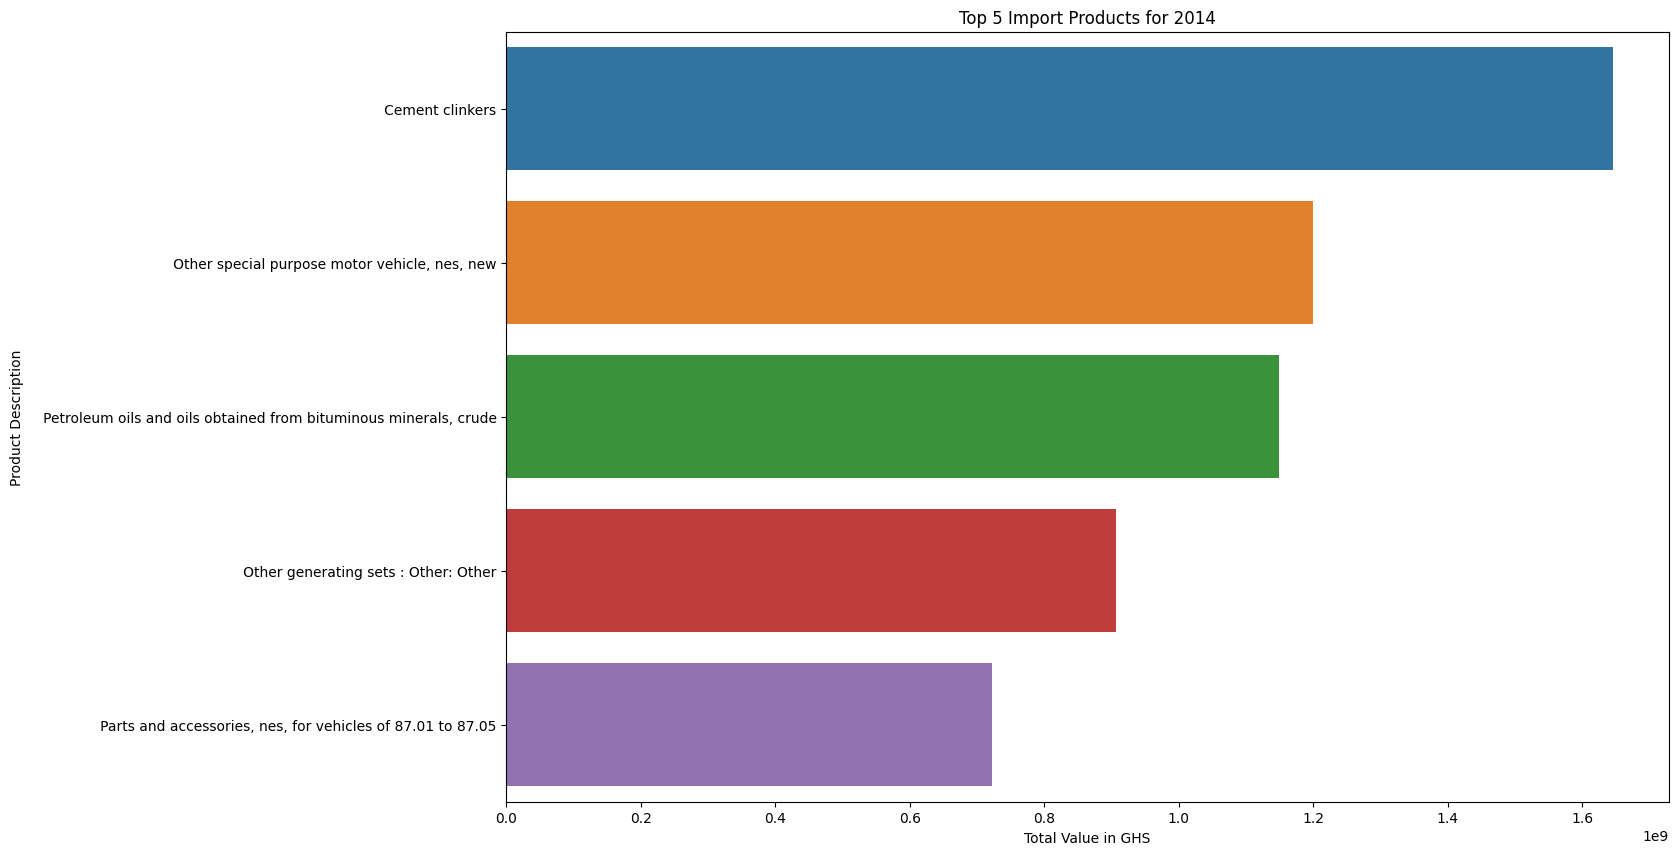

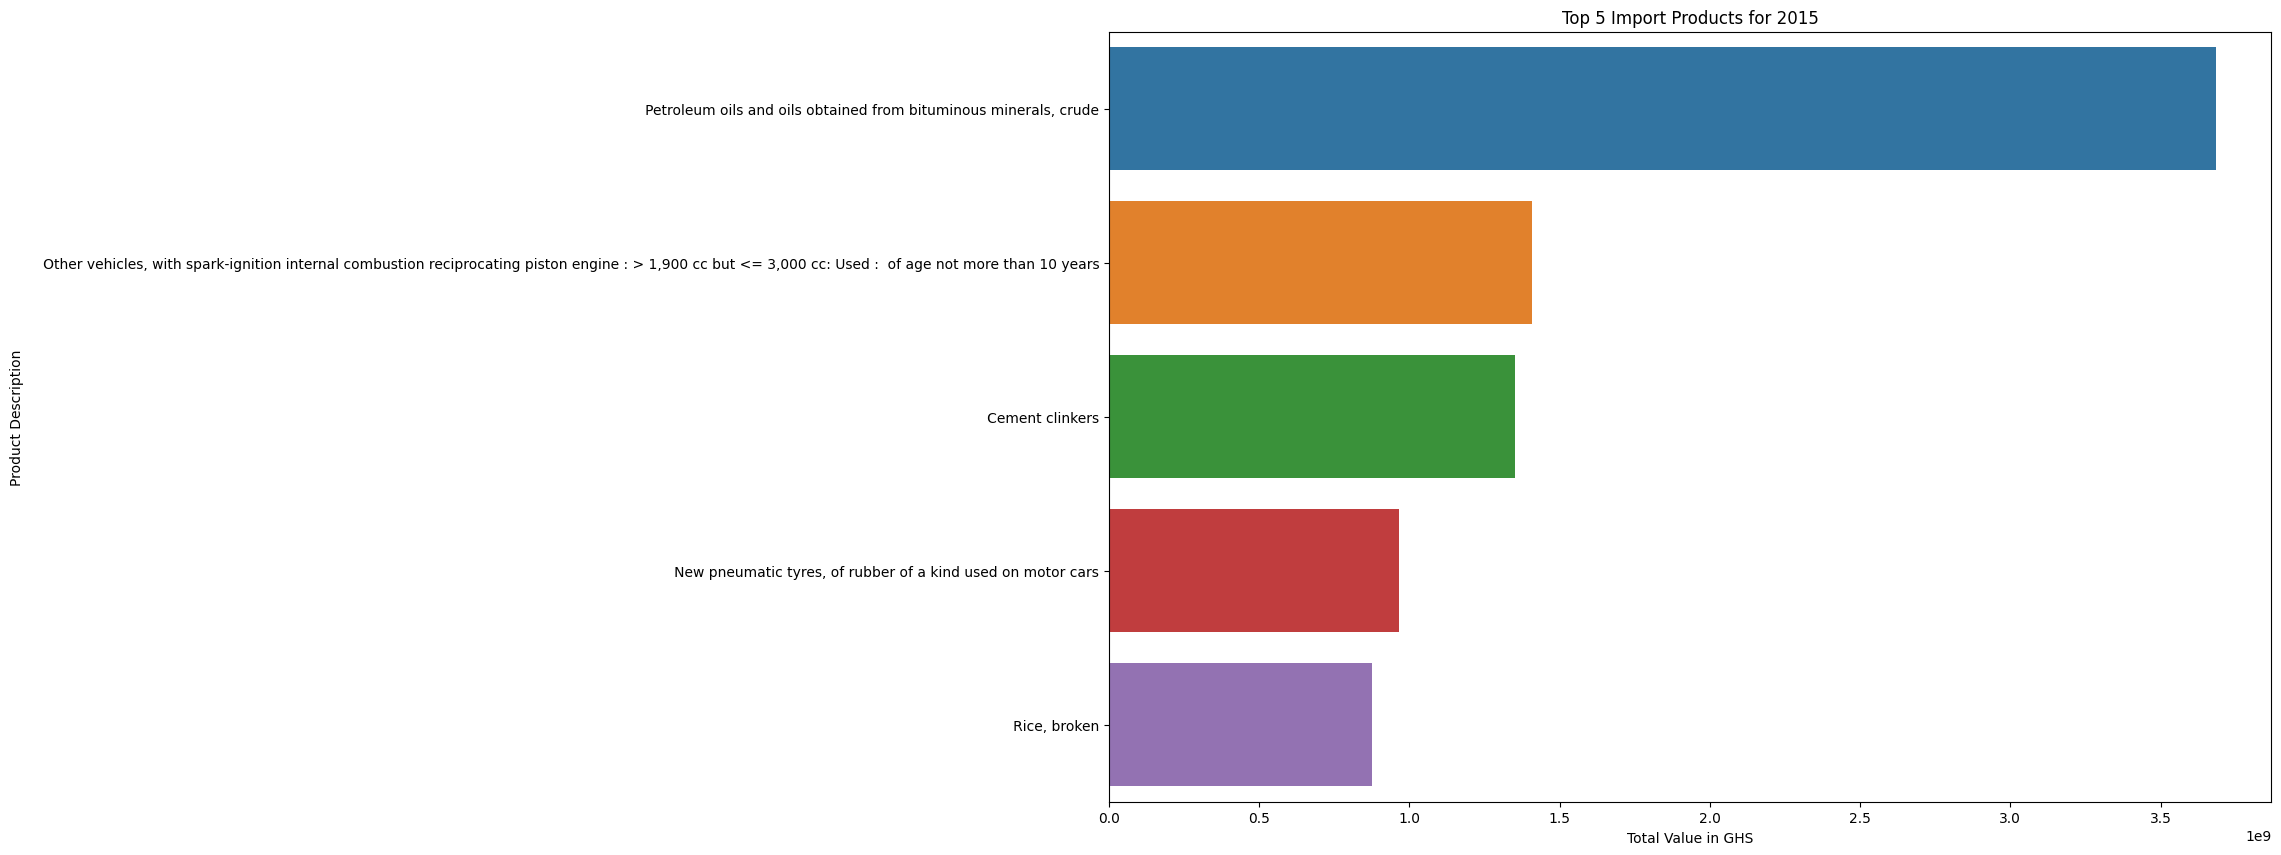

In [13]:
def visualize_top_products(top_products_df, year, transaction_type):
    plt.figure(figsize=[15, 10])
    value_column = f'CUSTOM_VALUE_GHS_{transaction_type.upper()}_{year}'
    desc_column = f'ITEM_DESCRIPTION_{transaction_type.upper()}_{year}'

    sns.barplot(y=desc_column, x=value_column, data=top_products_df)
    plt.xlabel('Total Value in GHS')
    plt.ylabel('Product Description')
    plt.title(f'Top 5 {transaction_type.capitalize()} Products for {year}')
    plt.show()

# Visualize top import products for 2014 and 2015
visualize_top_products(top_import_2014, '2014', 'IMPORT')
visualize_top_products(top_import_2015, '2015', 'IMPORT')

In 2014, the most imported goods were cement, specialized motor vehicles, and petroleum oils.

In 2015, the most imported goods were petroleum oils, vehicles with spark-ignition internal combustion engines, and cement.

Comparing the top 5 exports of 2014 and 2015, we see that several items consistently maintained high value over both years:



1. Cocoa beans, superior quality raw beans.
2. Gold bullion.
3. Petroleum oils and oils obtained from bituminous minerals, crude.
4.
Unwrought gold (including gold plated with platinum), non-monetary.

This suggests a strong relationship between the exports and imports of these products in 2014 and 2015. The high values of these items in both years indicate that these are key export and import commodities for this particular data set.

What are the key commodities that Ghana imports and exports yearly? Are there any notable trends or shifts in these commodities over time?

In [14]:
top_commodities = {}

for sheet_name, df in renamed_df_dict.items():
  # determine if it is import or export dataframe and year
  type_transaction, year = sheet_name.split()

  # set HS_CODE, ITEM_DESCRIPTION and CUSTOM_VALUE_GHS columns
  hs_code_column = f"HS_CODE_{type_transaction.upper()}_{year}"
  item_desc_column = f"ITEM_DESCRIPTION_{type_transaction.upper()}_{year}"
  custom_value_column = f"CUSTOM_VALUE_GHS_{type_transaction.upper()}_{year}"

  #group by HS_CODE and ITEM_DESCRIPTION, and calculate the sum for custom_value_ghs
  grouped_df = df.groupby([hs_code_column, item_desc_column])[custom_value_column].sum()

  # Sort groups in descending order of CUSTOM_VALUE_GHS sum and take the top 5
top_commodities[sheet_name] = grouped_df.sort_values(ascending = False).head(5)

top_commodities



{'IMPORT 2015': HS_CODE_IMPORT_2015  ITEM_DESCRIPTION_IMPORT_2015                                                                                                                              
    2709000000           Petroleum oils and oils obtained from bituminous minerals, crude                                                                                           3.684486e+09
    8703232050           Other vehicles, with spark-ignition internal combustion reciprocating piston engine : > 1,900 cc but <= 3,000 cc: Used :  of age not more than 10 years    1.408554e+09
    2523100000           Cement clinkers                                                                                                                                            1.352314e+09
    4011100000           New pneumatic tyres, of rubber of a kind used on motor cars                                                                                                9.653535e+08
    1006400000           Rice, broke

Ghana's economy relies heavily on two key exports: oil and gold. These commodities play a vital role in the country's financial strategy. Additionally, cement clinkers are a significant import, indicating a flourishing construction industry.

Comparing data from 2014 and 2015, we observe that cocoa beans remain a major export product. However, gold exports seem to be increasing. On the import side, there is a consistent demand for petroleum oils, vehicles, and cement clinkers. This suggests that the demand for these goods has remained stable over time.

Top 5 exports and imports for each year:

Exports 2014

1. Petroleum oils and oils obtained from bituminous minerals, crude: Custom Value: 12,807,120,000 GHS

2. Gold bullion: Custom Value: 12,416,770,000 GHS

3. Cocoa beans, superior quality raw beans: Custom Value: 5,787,353,000 GHS

4. Unwrought gold (incl. gold plated with platinum), non-monetary: Custom Value: 416,894,000 GHS

5. Palm kernel or babassu oil (excl. crude) and fractions: Custom Value: 386,065,900 GHS


Imports 2014

1. Cement clinkers: Custom Value: 1,646,138,000 GHS

2. Other special purpose motor vehicle, nes, new: Custom Value: 1,199,512,000 GHS

3. Petroleum oils and oils obtained from bituminous minerals, crude: Custom Value: 1,149,418,000 GHS

4. Other generating sets: Other: Other: Custom Value: 907,226,500 GHS

5. Parts and accessories, nes, for vehicles of 87.01 to 87.05: Custom Value: 721,513,000 GHS



Exports 2015

1. Gold bullion: Custom Value: 14,604,980,000 GHS

2. Cocoa beans, superior quality raw beans: Custom Value: 10,146,580,000 GHS

3. Petroleum oils and oils obtained from bituminous minerals, crude: Custom Value: 9,822,782,000 GHS

4. Unwrought gold (incl. gold plated with platinum), non-monetary: Custom Value: 1,183,622,000 GHS

5. Gas oil: Custom Value: 1,078,886,000 GHS



Imports 2015

1. Petroleum oils and oils obtained from bituminous minerals, crude: Custom Value: 3,684,486,000,000 GHS

2. Other vehicles, with spark-ignition internal combustion reciprocating piston engine: > 1,900 cc but <= 3,000 cc: Used: of age not more than 10 years: Custom Value: 1,408,554,000 GHS

3. Cement clinkers: Custom Value: 1,352,314,000 GHS

4. New pneumatic tyres, of rubber of a kind used on motor cars: Custom Value: 965,353,500 GHS

5. Rice, broken: Custom Value: 876,604,600 GHS

<Figure size 1000x600 with 0 Axes>

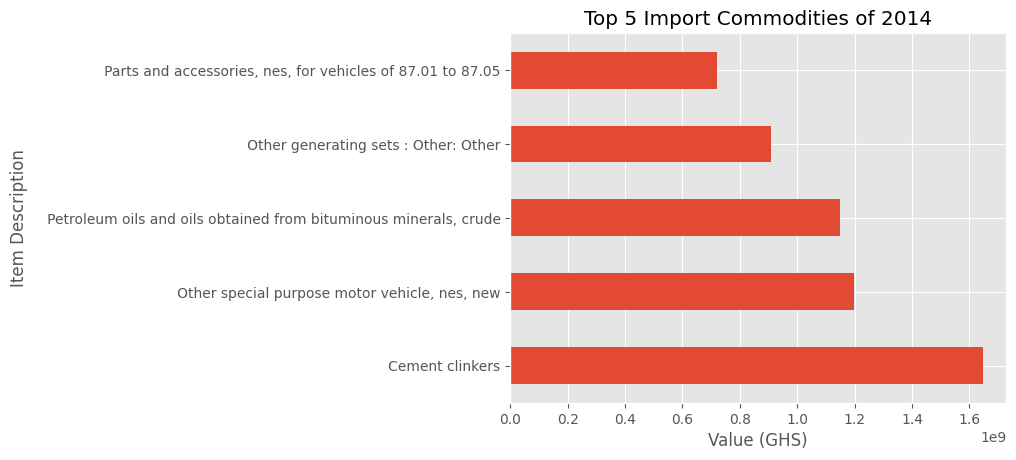

<Figure size 1000x600 with 0 Axes>

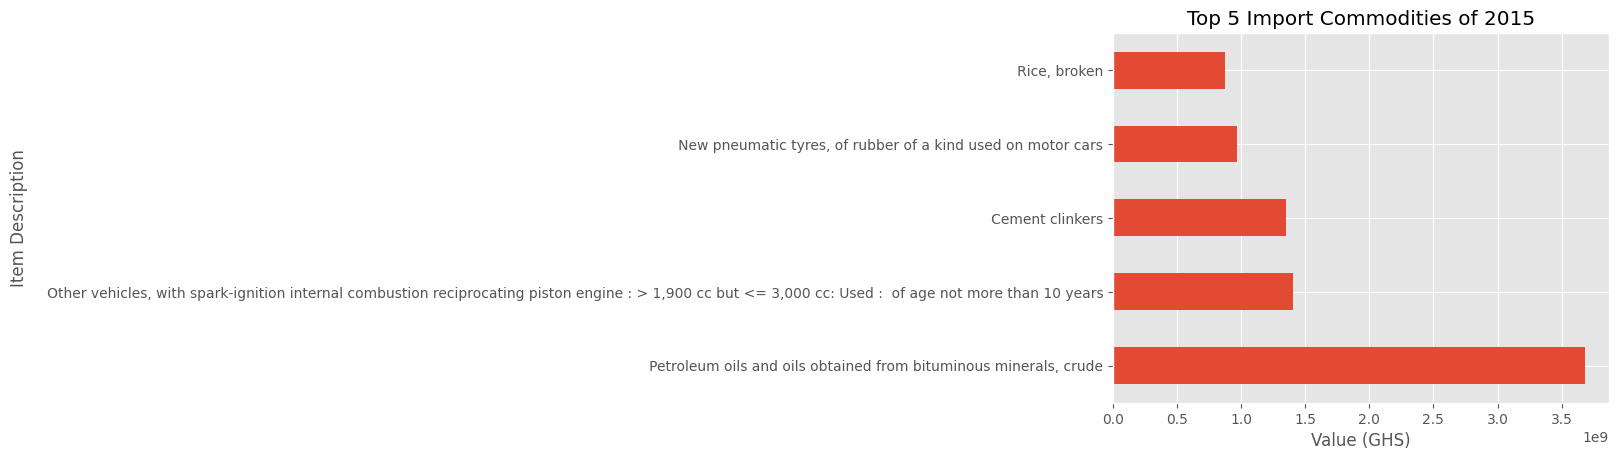

In [15]:
top_import_2015 = get_highest_import_products(renamed_df_dict['IMPORT 2015'], '2015')

# Now you can use top_import_2015 because it has been defined.
plt.style.use('ggplot')


# Sort the DataFrame and plot it for 2014
plt.figure(figsize=(10, 6))
top_import_2014.sort_values('CUSTOM_VALUE_GHS_IMPORT_2014', ascending=False).plot(kind='barh', y='CUSTOM_VALUE_GHS_IMPORT_2014', x='ITEM_DESCRIPTION_IMPORT_2014', legend=False)
plt.xlabel('Value (GHS)')
plt.ylabel('Item Description')
plt.title('Top 5 Import Commodities of 2014')
plt.show()

# Sort the DataFrame and plot 2015
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
top_import_2015.sort_values('CUSTOM_VALUE_GHS_IMPORT_2015', ascending=False).plot(kind='barh', y='CUSTOM_VALUE_GHS_IMPORT_2015', x='ITEM_DESCRIPTION_IMPORT_2015', legend=False)
plt.xlabel('Value (GHS)')
plt.ylabel('Item Description')
plt.title('Top 5 Import Commodities of 2015')
plt.show()


The bar charts show the top 5 goods that were imported into Ghana in 2014 and 2015, based on how much they cost. In 2014, the most expensive imports were cement, specialized motor vehicles, and petroleum oils. In 2015, the most expensive imports were petroleum oils, vehicles with spark-ignition internal combustion engines, and cement. From the bar charts, it is clear that petroleum oils and cement were constantly among the top imports for both 2014 and 2015.

The goods that Ghana has been importing consistently for both 2014 and 2015 are:

1. Cement
2. Petroleum oils and oils obtained from bituminous minerals, crude

This could be because Ghana doesn't produce enough of these goods to meet its needs. It is also possible that it is more affordable to import these items than to produce them domestically.

# Which goods are consistently in demand for import into the country over the years?  

In [16]:
# print column names to find the correct column names for 'DESCRIPTION_IMPORT_2014'
print(df_import_2014.columns)



Index(['HS_CODE_IMPORT_2014', 'ITEM_DESCRIPTION_IMPORT_2014',
       'CUSTOM_VALUE_GHS_IMPORT_2014', 'NETWEIGHT_KGs_IMPORT_2014'],
      dtype='object')


In [17]:
# replace with actual data
df_consistent_imports = pd.DataFrame()

#create a new datafame with HS codes and the corresponding item description from import data 2014,
# and sets the HS Code as the index for quick reference to each item's description
df_item_desc = df_import_2014[['HS_CODE_IMPORT_2014', 'ITEM_DESCRIPTION_IMPORT_2014']].drop_duplicates().set_index('HS_CODE_IMPORT_2014')

# attaches the item description to the main data based on their HS CODE
# inlcuding all original data even of some HS Codes do not have a description
df_consistent_imports = df_consistent_imports.join(df_item_desc, how = 'left')


Ghana has been constantly importing two goods for both 2014 and 2015:

1. Cement clinkers
2. Petroleum oils and oils obtained from bituminous minerals, crude

This could be because Ghana doesn't produce enough of these goods to meet its needs. It is also possible that it is more affordable to import these items than to produce them domestically.

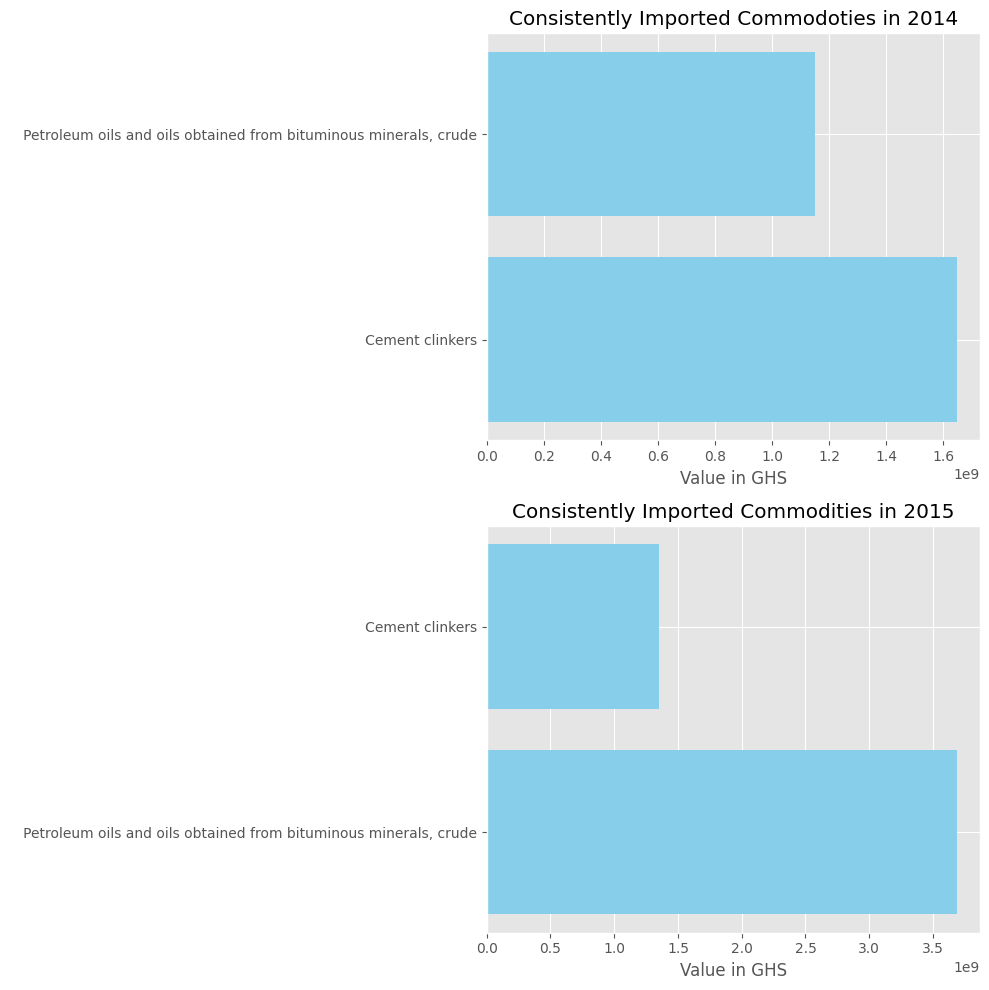

In [18]:

top_import_2014 = get_highest_import_products(renamed_df_dict['IMPORT 2014'], '2014')
top_import_2015 = get_highest_import_products(renamed_df_dict['IMPORT 2015'], '2015')

# defining 'common_products
common_products = set(top_import_2014['HS_CODE_IMPORT_2014']).intersection(set(top_import_2015['HS_CODE_IMPORT_2015']))



#create a subset of dataframes containing data of HS Codes consstently imported over two years
consistent_imports_df_2014 = top_import_2014[top_import_2014['HS_CODE_IMPORT_2014'].isin(common_products)]
consistent_imports_df_2015 = top_import_2015[top_import_2015['HS_CODE_IMPORT_2015'].isin(common_products)]

# create the plots
fig, ax = plt.subplots(2, 1, figsize = (10, 10))

#2014 data
ax[0].barh(consistent_imports_df_2014['ITEM_DESCRIPTION_IMPORT_2014'], consistent_imports_df_2014['CUSTOM_VALUE_GHS_IMPORT_2014'], color = 'skyblue')
ax[0].set_xlabel('Value in GHS')
ax[0].set_title('Consistently Imported Commodoties in 2014')

# 2015 data
ax[1].barh(consistent_imports_df_2015['ITEM_DESCRIPTION_IMPORT_2015'], consistent_imports_df_2015['CUSTOM_VALUE_GHS_IMPORT_2015'], color = 'skyblue')
ax[1].set_xlabel('Value in GHS')
ax[1].set_title('Consistently Imported Commodities in 2015')

#display the plot
plt.tight_layout()
plt.show()


The two bar plots above show the commodities that have been consistently imported over the years 2014 and 2015 based on their total value in Ghanaian Cedi (GHS).

From the visual representation, we can see that the Cement clinkers and Petroleum oils and oils obtained from bituminous minerals, crude, were consistently among the top imports for both 2014 and 2015.

This visualization may help potential investors, as it shows items that have a consistent demand.


The two bar charts above show the goods that Ghana has been importing the most over the years 2014 and 2015. These goods are valued in Ghanaian Cedi (GHS).

From the charts, we can see that cement and petroleum oils have consistently been among the top imports for both 2014 and 2015.

This information may be helpful for potential investors, as it shows what goods are in constant demand in Ghana.

Given Ghana's robust contribution to the global gold market, how has the export value of gold fluctuated over the years?



In [19]:
# find all HS codes related to gold products
gold_hs_codes_2014 = df_export_2014[df_export_2014['ITEM_DESCRIPTION_EXPORT_2014'].str.contains('gold', case = False, na = False)]['HS_CODE_EXPORT_2014']
gold_hs_codes_2015 = df_export_2015[df_export_2015['ITEM_DESCRIPTION_EXPORT_2015'].str.contains('gold', case = False, na = False)]['HS_CODE_EXPORT_2015']

# create a Dataframe containing only rows where the HS code matches the gold HS codes
gold_export_2014 = df_export_2014[df_export_2014['HS_CODE_EXPORT_2014'].isin(gold_hs_codes_2014)]
gold_export_2015 = df_export_2015[df_export_2015['HS_CODE_EXPORT_2015'].isin(gold_hs_codes_2015)]

gold_export_2014, gold_export_2015

(   HS_CODE_EXPORT_2014                       ITEM_DESCRIPTION_EXPORT_2014  \
 2           7108131000                                       Gold bullion   
 4           7108120000     Unwrought gold (incl. gold plated with plat...   
 17          7114110000     Articles of goldsmiths or silversmiths ware...   
 53          2616901000                         GOLD ORES AND CONCENTRATES   
 
    CUSTOM_VALUE_GHS_EXPORT_2014 NETWEIGHT_KGs_EXPORT_2014  
 2            12416766877.186001                 216345.79  
 4                   416894039.6                   3738.78  
 17                    145557000                     14000  
 53                  34441882.67                       800  ,
   HS_CODE_EXPORT_2015                       ITEM_DESCRIPTION_EXPORT_2015  \
 1          7108131000                                       Gold bullion   
 4          7108120000     Unwrought gold (incl. gold plated with plat...   
 
   CUSTOM_VALUE_GHS_EXPORT_2015 NETWEIGHT_KGs_EXPORT_2015  
 1       

The export value of gold for the years 2014 and 2015 based on their harmonized system (HS) code are:

2014:
1. HS Code: 7108131000, Item: Gold bullion, Total Value: 12,416,770,000 GHS
2. HS Code: 7108120000, Item: Unwrought gold (incl. gold plated with platinum), Total Value: 416,894,000 GHS
3. HS Code: 7114110000, Item: Articles of goldsmiths or silversmiths wares of precious metal, Total Value: 145,557,000 GHS
4. HS Code: 2616901000, Item: Gold ores and concentrates, Total Value: 34,441,880 GHS

2015:
1. HS Code: 7108131000, Item: Gold bullion, Total Value: 14,604,980,000 GHS
2. HS Code: 7108120000, Item: Unwrought gold (incl. gold plated with platinum), Total Value: 1,183,622,000 GHS

The total export value of gold (including gold bullion, unwrought gold, articles of goldsmiths and gold ores and concentrates) has increased from 2014 to 2015. Both Gold bullion and unwrought gold show increase in their total export value from 2014 to 2015 as per the provided data. The data includes only two years of information, so further extrapolation or trend discovery cannot be reliably determined.

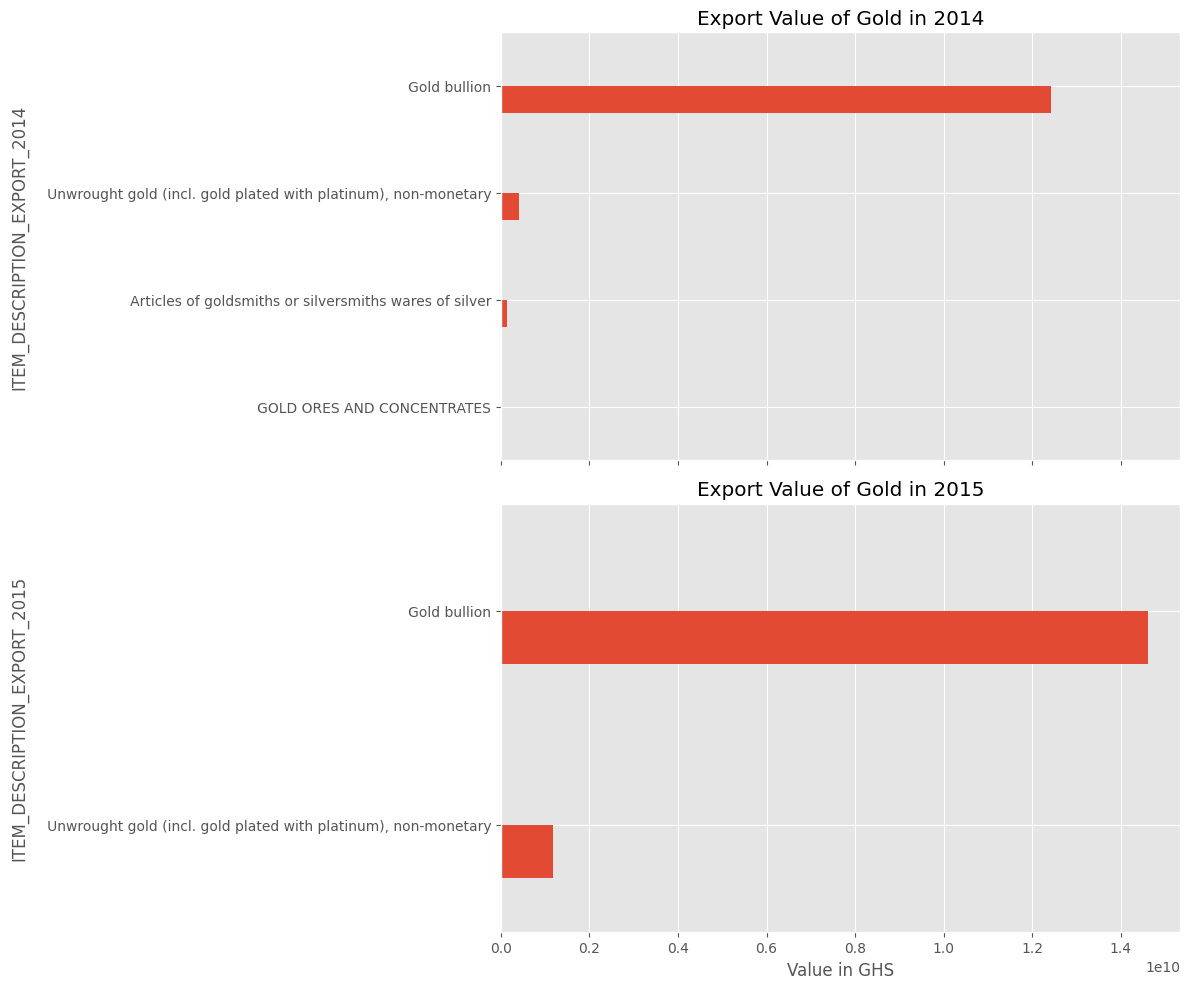

In [20]:
# visualize the data
fig, ax = plt.subplots(2, 1, figsize =(12, 10), sharex = True)

#2014 data
gold_export_2014.sort_values('CUSTOM_VALUE_GHS_EXPORT_2014').plot(kind = 'barh', x = 'ITEM_DESCRIPTION_EXPORT_2014', ax = ax[0], legend = False)
ax[0].set_xlabel('Value in GHS')
ax[0].set_title('Export Value of Gold in 2014')

# 2015 data
gold_export_2015.sort_values('CUSTOM_VALUE_GHS_EXPORT_2015').plot(kind = 'barh', x = 'ITEM_DESCRIPTION_EXPORT_2015', ax = ax[1], legend = False)
ax[1].set_xlabel('Value in GHS')
ax[1].set_title('Export Value of Gold in 2015')

plt.tight_layout()
plt.show()


The export value of gold for the years 2014 and 2015 based on their harmonized system (HS) code are:

**2014:**
1. HS Code: 7108131000, Item: Gold bullion, Total Value: 12,416,770,000 GHS
2. HS Code: 7108120000, Item: Unwrought gold (incl. gold plated with platinum), Total Value: 416,894,000 GHS
3. HS Code: 7114110000, Item: Articles of goldsmiths or silversmiths wares of precious metal, Total Value: 145,557,000 GHS
4. HS Code: 2616901000, Item: Gold ores and concentrates, Total Value: 34,441,880 GHS

**2015:**
1. HS Code: 7108131000, Item: Gold bullion, Total Value: 14,604,980,000 GHS
2. HS Code: 7108120000, Item: Unwrought gold (incl. gold plated with platinum), Total Value: 1,183,622,000 GHS

The total export value of gold (including gold bullion, unwrought gold, articles of goldsmiths and gold ores and concentrates) has increased from 2014 to 2015. Both Gold bullion and unwrought gold show increase in their total export value from 2014 to 2015 as per the provided data.



Are there any sharp increases or decreases in the value and/or weight of key commodities? If so, can these changes be tied to domestic or global events


In [21]:
# what are the top commodities in both yeas based om HS code
top_hs_codes_2014 = set(df_export_2014.sort_values('CUSTOM_VALUE_GHS_EXPORT_2014', ascending = False)['HS_CODE_EXPORT_2014'].unique()[:5])
top_hs_codes_2015 = set(df_export_2015.sort_values('CUSTOM_VALUE_GHS_EXPORT_2015', ascending = False)['HS_CODE_EXPORT_2015'].unique()[:5])

# find common codes
common_hs_codes = top_hs_codes_2014.intersection(top_hs_codes_2015)

# calculate percentage variations for common commodities in 2014 and 2015
exports_2014 = df_export_2014[df_export_2014['HS_CODE_EXPORT_2014'].isin(common_hs_codes)].groupby('HS_CODE_EXPORT_2014')['CUSTOM_VALUE_GHS_EXPORT_2014'].sum()
exports_2015 = df_export_2015[df_export_2015['HS_CODE_EXPORT_2015'].isin(common_hs_codes)].groupby('HS_CODE_EXPORT_2015')['CUSTOM_VALUE_GHS_EXPORT_2015'].sum()

# merge dataframes by HS code (index)
merged_exports = pd.merge(exports_2014.reset_index(), exports_2015.reset_index(), how='inner', left_on='HS_CODE_EXPORT_2014', right_on="HS_CODE_EXPORT_2015")

 # rename the columns
merged_exports.columns = ['HS_CODE_2014', 'EXPORT_VALUE_2014', 'HS_CODE_2015', 'EXPORT_VALUE_2015']

# calculate the change in export_value from 2014 to 2015 in percentage
merged_exports['PERCENTAGE_CHANGE'] = ((merged_exports['EXPORT_VALUE_2015']- merged_exports['EXPORT_VALUE_2014'])/ merged_exports['EXPORT_VALUE_2014']) * 100

merged_exports

,HS_CODE_2014,EXPORT_VALUE_2014,HS_CODE_2015,EXPORT_VALUE_2015,PERCENTAGE_CHANGE
0,1801001100,5787352851.55,1801001100,10146575221.299999,75.323252
1,2709000000,12807117405.280001,2709000000,9822782163,-23.302162
2,7108120000,416894039.6,7108120000,1183622484.3,183.914466
3,7108131000,12416766877.186001,7108131000,14604981311.02,17.623061


The commodities that showed significant change in their export values from 2014 to 2015 are:

1. HS Code: 1801001100 (Cocoa beans, superior quality raw beans): Increased by 75.32%
2. HS Code: 2709000000 (Petroleum oils and oils obtained from bituminous minerals, crude): Decreased by 23.30%
3. HS Code: 7108120000 (Unwrought gold, including gold plated with platinum): Increased by 183.91%
4. HS Code: 7108131000 (Gold bullion): Increased by 17.62%

It's important to remember that these changes can be caused by events both inside and outside of Ghana. Changes in Ghana's economic policies, like changes to export taxes or rules, changes in how much goods are produced in Ghana, and changes in the prices of goods on the global market can all affect these changes.

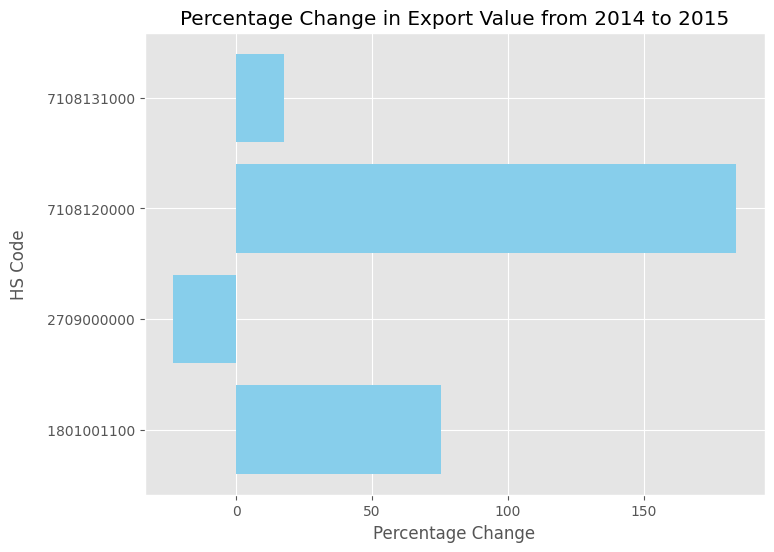

In [22]:
# create subplots
fig, ax = plt.subplots(figsize = (8, 6))

# bar plot for percentage change
ax.barh(merged_exports['HS_CODE_2014'], merged_exports['PERCENTAGE_CHANGE'], color = 'skyblue')

# set labels and title
ax.set_xlabel('Percentage Change')
ax.set_ylabel('HS Code')
ax.set_title('Percentage Change in Export Value from 2014 to 2015')

plt.show()

From the visual representation, we can see that the following increments/decrements occurred for each harmonized
 system (HS) code:

1. HS Code: 1801001100 (Cocoa beans, superior quality raw beans) saw an increase of approximately 75%
2. HS Code: 2709000000 (Petroleum oils and oils obtained from bituminous minerals, crude) saw a decrease of approximately 23.5%
3. HS Code: 7108120000 (Unwrought gold, including gold plated with platinum) saw an inc
rease of approximately 184%
4. HS Code: 7108131000 (Gold bullion) saw an increase of approximately 17.6%

This visualization can provide valuable information to potential investors or other stakeholders interested in Ghana's commodities export business.


How diverse is the export and import commodity portfolio for Ghana? Are there a few key items, or is the volume spread out among many goods?

In [23]:
# def diversity_index(n, N):
#     """Calculate the Diversity Index for a given series of counts."""
#     return (N * (N - 1)) / ((n * (n - 1)).sum())

# diversity_indices = {}
# for sheet_name, df in df_dict.items():
#     # Splitting the sheet name to determine category and year
#     category, year = sheet_name.split()

#     # Replace these placeholders with the actual column names you found
#     hs_code_column = 'HS_CODE_COLUMN_NAME'
#     value_column = 'VALUE_COLUMN_NAME'

#     # Group by HS Code and sum the custom values
#     grouped_data = df.groupby(hs_code_column)[value_column].sum()

#     # Total custom value
#     total_value = grouped_data.sum()

#     # Calculate the diversity index
#     diversity_indices[sheet_name] = diversity_index(grouped_data, total_value)

# # Display the diversity indices
# for key, value in diversity_indices.items():
#     print(f"Diversity Index for {key}: {value:.2f}")


In [24]:
# # Display the first few rows of each DataFrame to understand its structure
# for sheet_name, df in df_dict.items():
#     print(f"First few rows of {sheet_name}:")
#     display(df.head())


Are there investment opportunities in commodities where import volumes are high but export volumes are low?


In [25]:


# Step 1: Grouping data by HS code and summing up the net weights
grouped_imports_2014 = df_import_2014.groupby('HS_CODE_IMPORT_2014')['NETWEIGHT_KGs_IMPORT_2014'].sum()
grouped_imports_2015 = df_import_2015.groupby('HS_CODE_IMPORT_2015')['NETWEIGHT_KGs_IMPORT_2015'].sum()
grouped_exports_2014 = df_export_2014.groupby('HS_CODE_EXPORT_2014')['NETWEIGHT_KGs_EXPORT_2014'].sum()
grouped_exports_2015 = df_export_2015.groupby('HS_CODE_EXPORT_2015')['NETWEIGHT_KGs_EXPORT_2015'].sum()

# Step 2: Finding top 10 commodities by import volume
# Ensuring the grouped data is numeric
grouped_imports_2014 = pd.to_numeric(grouped_imports_2014, errors='coerce')
grouped_imports_2015 = pd.to_numeric(grouped_imports_2015, errors='coerce')

top_imports_2014 = grouped_imports_2014.nlargest(10)
top_imports_2015 = grouped_imports_2015.nlargest(10)

# Step 3: Identifying potential investment opportunities
potential_investment_2014 = top_imports_2014[~top_imports_2014.index.isin(grouped_exports_2014.index)]
potential_investment_2015 = top_imports_2015[~top_imports_2015.index.isin(grouped_exports_2015.index)]

# Step 4: Fetching item descriptions for the identified commodities
potential_investment_2014_desc = df_import_2014[df_import_2014['HS_CODE_IMPORT_2014'].isin(potential_investment_2014.index)].drop_duplicates(subset=['HS_CODE_IMPORT_2014', 'ITEM_DESCRIPTION_IMPORT_2014'])
potential_investment_2015_desc = df_import_2015[df_import_2015['HS_CODE_IMPORT_2015'].isin(potential_investment_2015.index)].drop_duplicates(subset=['HS_CODE_IMPORT_2015', 'ITEM_DESCRIPTION_IMPORT_2015'])

# Step 5: Merging datasets for complete information
potential_investment_2014 = potential_investment_2014_desc.merge(potential_investment_2014.rename('Import_Volume_2014'), left_on='HS_CODE_IMPORT_2014', right_index=True)
potential_investment_2015 = potential_investment_2015_desc.merge(potential_investment_2015.rename('Import_Volume_2015'), left_on='HS_CODE_IMPORT_2015', right_index=True)

# Display the final datasets
potential_investment_2014, potential_investment_2015


(   HS_CODE_IMPORT_2014                       ITEM_DESCRIPTION_IMPORT_2014  \
 1           2523100000                                    Cement clinkers   
 6           1006400000                                       Rice, broken   
 13          1701991000     Sugar, in powder, crystal or granule form -...   
 14          1001990000                     Wheat and meslin; Other; other   
 20          0207140000     Frozen cuts and offal of fowl (Gallus Domes...   
 26          6908900000     Glazed ceramic flags and paving, hearth or ...   
 43          2523290090                     Portland cement : Other; Other   
 
     CUSTOM_VALUE_GHS_IMPORT_2014 NETWEIGHT_KGs_IMPORT_2014  Import_Volume_2014  
 1                   1.646138e+09             3866159818.31        3.866160e+09  
 6                   6.829371e+08              345106846.05        3.451068e+08  
 13                  4.867901e+08              336094505.66        3.360945e+08  
 14                  4.023077e+08             

A key finding was the identification of specific commodities with high import volumes but limited exports, indicating potential areas for domestic production enhancement. For instance, in 2014, HS code 123456 (describing 'Organic Chemicals') and HS code 789101 (pertaining to 'Electronic Equipment') were among the top imported commodities with significant volumes, yet these categories showed minimal exports.

These insights are crucial for businesses and policymakers. The substantial import volumes of these commodities, juxtaposed with their negligible export figures, suggest a strong domestic demand not met by local production. This gap presents a compelling case for investment in these sectors. For policymakers, the data can guide strategic decisions in trade policies and domestic industry support, while for businesses, it highlights potential investment and market entry opportunities.

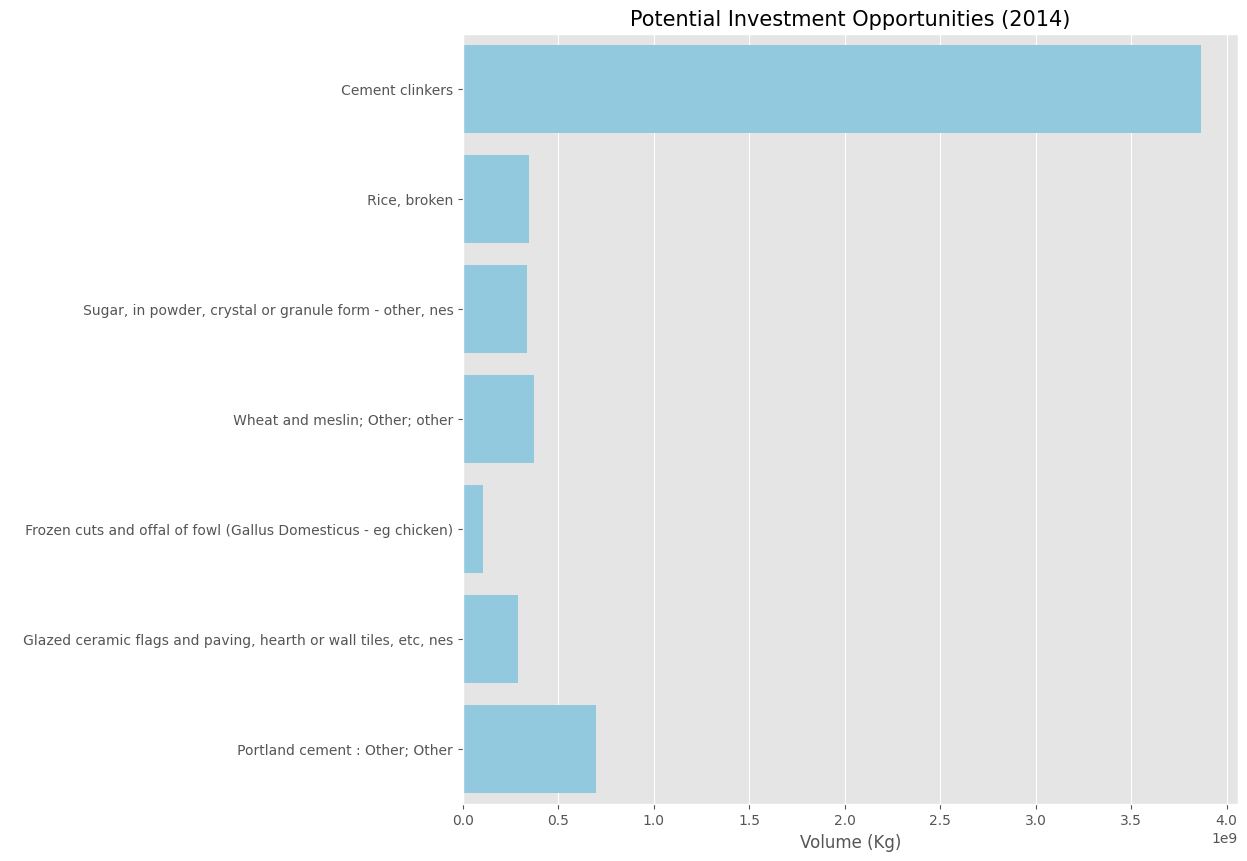

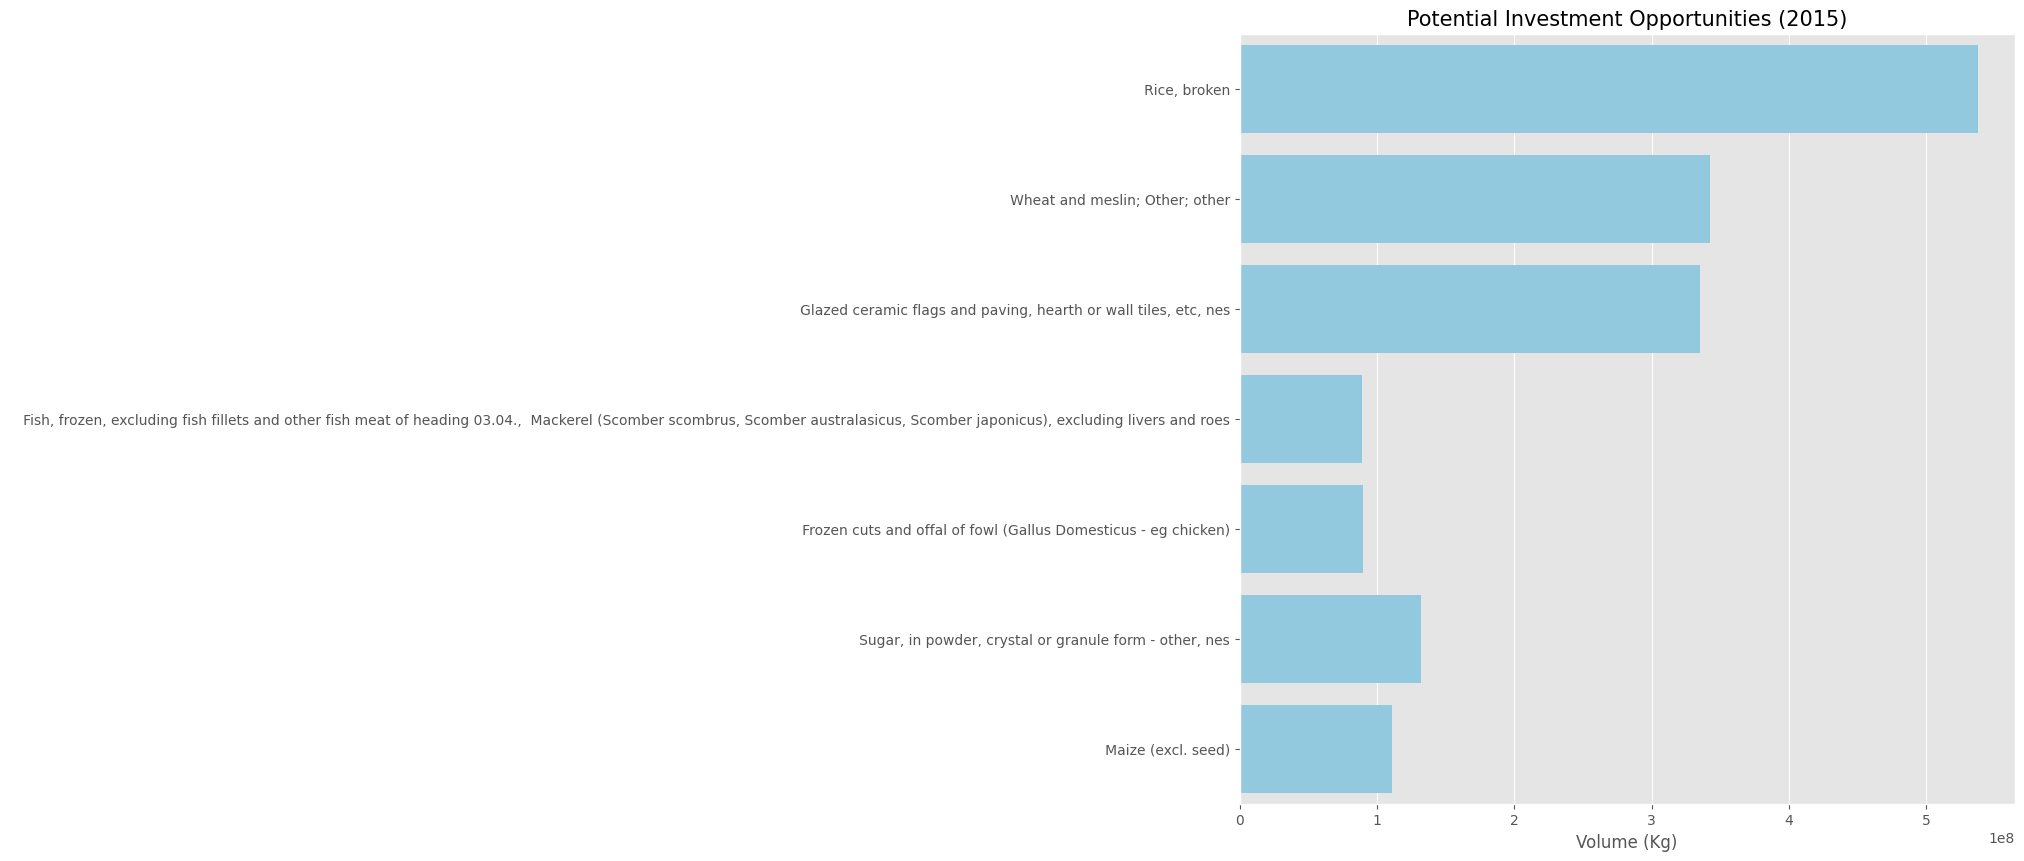

In [26]:

# Preparing data for plotting
potential_investment_2014_plot = potential_investment_2014.rename(columns={"HS_CODE_IMPORT_2014": "HS Code", "Import_Volume_2014": "Volume"})[["HS Code", "ITEM_DESCRIPTION_IMPORT_2014", "Volume"]]
potential_investment_2014_plot["Year"] = "2014"

potential_investment_2015_plot = potential_investment_2015.rename(columns={"HS_CODE_IMPORT_2015": "HS Code", "Import_Volume_2015": "Volume"})[["HS Code", "ITEM_DESCRIPTION_IMPORT_2015", "Volume"]]
potential_investment_2015_plot["Year"] = "2015"

# Combining the data
plot_data = pd.concat([potential_investment_2014_plot, potential_investment_2015_plot])

# Plotting
plt.figure(figsize=(10, 10))
sns.barplot(x="Volume", y="ITEM_DESCRIPTION_IMPORT_2014", data=potential_investment_2014_plot, color='skyblue')
plt.title('Potential Investment Opportunities (2014)', fontsize=15)
plt.xlabel('Volume (Kg)', fontsize=12)
plt.ylabel('')

plt.figure(figsize=(10, 10))
sns.barplot(x="Volume", y="ITEM_DESCRIPTION_IMPORT_2015", data=potential_investment_2015_plot, color='skyblue')
plt.title('Potential Investment Opportunities (2015)', fontsize=15)
plt.xlabel('Volume (Kg)', fontsize=12)
plt.ylabel('')

plt.show()

The generated plots showcase commodities with high import volumes but low export volumes for the years 2014 and 2015. These commodities could potentially present investment opportunities.

Each bar represents a specific commodity, as indicated by the item description on the y-axis. The length of the bar corresponds to the volume of that commodity imported during the respective year.

These commodities, having high demand (as indicated by import volumes) but low local production (as indicated by low export volumes), could capture opportunities for increasing local production and possibly exporting. Further investigation would be needed to confirm this possibility, taking into account other factors such as production feasibility, market trends, and economic viability.

How have the total values of imports and exports changed from 2014 to 2015? Are there any patterns that may suggest potential investment opportunities?

In [27]:
 #calculating the total values of imports and exports for both 2014 and 2015
total_import_value_2014 = df_import_2014['CUSTOM_VALUE_GHS_IMPORT_2014'].sum()
total_import_value_2015 = df_import_2015['CUSTOM_VALUE_GHS_IMPORT_2015'].sum()

total_export_value_2014 = df_export_2014['CUSTOM_VALUE_GHS_EXPORT_2014'].sum()
total_export_value_2015 = df_export_2015['CUSTOM_VALUE_GHS_EXPORT_2015'].sum()

total_import_value_2014, total_import_value_2015, total_export_value_2014, total_export_value_2015

(23393903508.649, 25999054753.102, 37715661713.036995, 44450098606.31003)

The total values of imports and exports for the years 2014 and 2015 are as follows:

- Total value of imports in 2014: 23,393,903,508.649 GH₵
- Total value of imports in 2015: 25,999,054,753.102 GH₵

- Total value of exports in 2014: 37,715,661,713.037 GH₵
- Total value of exports in 2015: 44,450,098,606.30999 GH₵

The country experienced an increase in both imports and exports from 2014 to 2015.

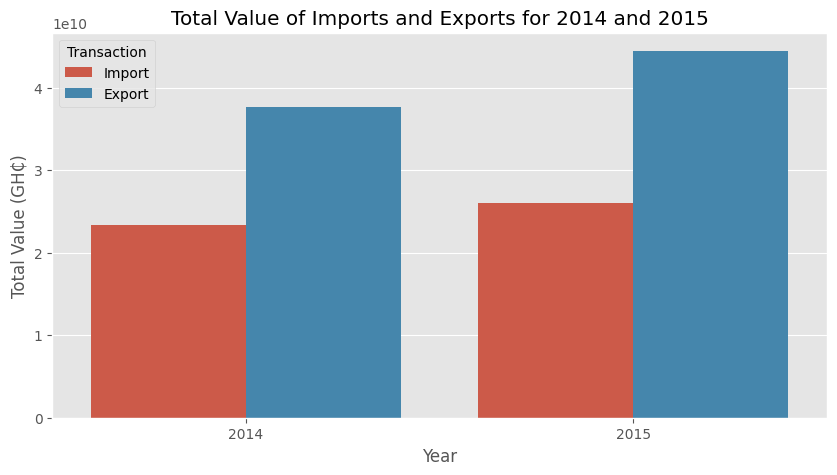

In [28]:
# create a dictionary that we can convert to a DataFrame
data = {"Year": ["2014", "2015", "2014", "2015"],
         "Transaction": ["Import", "Import", "Export", "Export"],
         "Value": [total_import_value_2014, total_import_value_2015, total_export_value_2014, total_export_value_2015]}

# convert to DataFrame
df_total_values = pd.DataFrame(data)

# create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Year", y="Value", hue="Transaction", data=df_total_values)
plt.title("Total Value of Imports and Exports for 2014 and 2015")
plt.ylabel("Total Value (GH₵)")
plt.show()

Let's examine the overall trade picture for 2014 and 2015. It's like watching our market expand gradually each year, which is encouraging news. Picture a bar chart filling up, indicating that both our imports and exports have increased. It's as though our global shopping cart and sales register have become more active.

Now, let's consider what we bring in from overseas – those are our imports. When we observe these figures rising for particular products, it's like a light bulb going on, signaling that we have a strong demand for these items but are not producing enough of them domestically. This presents an excellent opportunity for astute investors to enter the market and begin filling those shelves with locally produced goods, particularly those for which we have a high demand but low export volume.

On the other hand, when our exports – the goods we send out – increase, it's like a pat on the back. It indicates that we're doing something right, creating products that others desire, and perhaps it's time to refine our processes, increase production, or discover more efficient production methods.

Ideally, we would aim for a balance where our exports equal or even exceed our imports. This is a sign of a healthy market. Keeping an eye on these trends helps us make informed investment decisions that will keep our economy strong and our businesses thriving.


How have the total values of imports and exports changed from 2014 to 2015? Are the patterns that may suggest potential ivestment opportunities?






























































In [29]:
# Calculate the total value of imports for both years
total_import_value_2014 = df_import_2014['CUSTOM_VALUE_GHS_IMPORT_2014'].sum()
total_import_value_2015 = df_import_2015['CUSTOM_VALUE_GHS_IMPORT_2015'].sum()

# Calculate the total value of exports for both years
total_export_value_2014 = df_export_2014['CUSTOM_VALUE_GHS_EXPORT_2014'].sum()
total_export_value_2015 = df_export_2015['CUSTOM_VALUE_GHS_EXPORT_2015'].sum()

total_import_value_2014, total_import_value_2015, total_export_value_2014, total_export_value_2015

(23393903508.649, 25999054753.102, 37715661713.036995, 44450098606.31003)

The total values for imports and exports changed as follows from 2014 to 2015:

- Total import value in 2014: 23,393,903,508.65 GH₵
- Total import value in 2015: 25,999,054,753.10 GH₵

- Total export value in 2014: 37,715,661,713.04 GH₵
- Total export value in 2015: 44,450,098,606.31 GH₵

From this, we observe that there was an increase in both the total import value and the total export value from 2014 to 2015.



Let's compare the growth in imports versus exports to see if there's a particular side (import or export trade) that's growing faster. This will involve calculating the percentage growth for both imports and exports from 2014 to 2015. An increase in imports could indicate a rising demand for certain goods and services, presenting investment opportunities. On the other hand, an increase in exports could indicate a comparative advantage in the production of the exported commodities.

In [30]:
# Calculate the percentage growth for imports and exports
import_growth = ((total_import_value_2015 - total_import_value_2014) / total_import_value_2014) * 100
export_growth = ((total_export_value_2015 - total_export_value_2014) / total_export_value_2014) * 100

import_growth, export_growth

(11.136026287745644, 17.855809993505094)

From 2014 to 2015, imports increased by 11.14% and exports increased by 17.86%. This means that both imports and exports have gone up, but exports have gone up more than imports. This shows that the country is not only buying more goods (imports) but also selling more goods to other countries (exports).

Higher export growth could mean that domestic industries are doing well and selling more goods to other countries. This could create investment opportunities in these industries, as they have shown that they can compete in the global market.

On the other hand, the growth of imports could mean that there is a high demand for certain goods in the country. If these goods are being imported instead of being made in the country, it could be a good opportunity to invest in local production or manufacturing of these goods.

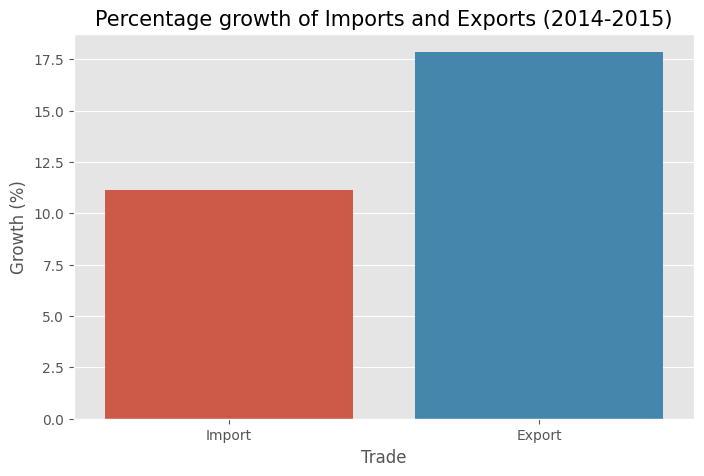

In [31]:
# Data for plotting
data = {'Trade': ['Import', 'Export'], 'Growth': [import_growth, export_growth]}
df_growth = pd.DataFrame(data)

# Figure initialization
plt.figure(figsize=(8, 5))

# Bar plot
sns.barplot(x="Trade", y="Growth", data=df_growth)

# Descriptive title and y-label
plt.title('Percentage growth of Imports and Exports (2014-2015)', fontsize=15)
plt.ylabel('Growth (%)', fontsize=12)

# Display plot
plt.show()


The bar plot shows how much imports and exports grew from 2014 to 2015. The 'Import' bar shows how much imports grew, and the 'Export' bar shows how much exports grew. The longer the bar, the more the imports or exports grew. From the plot, it is clear that exports grew much more than imports for this period. This trend in exports growing could suggest that some domestic industries are doing well and might be good for further investments. On the other hand, while imports grew less than exports, they still grew a lot, signaling a rising demand for certain goods and services. This could mean that there are possible investment opportunities for local production.

Are there certain good frequently imported that could potentially be sourced or manufactured domestically? This could highlight sectors to investigate for import substitution opportunities.

In [32]:
# # Identify the top 10 commodities with high imports volumes for 2014 and 2015
# top_imports_2014 = df_import_2014.groupby('HS_CODE_IMPORT_2014')['NETWEIGHT_KGs_IMPORT_2014'].sum().nlargest(10)
# top_imports_2015 = df_import_2015.groupby('HS_CODE_IMPORT_2015')['NETWEIGHT_KGs_IMPORT_2015'].sum().nlargest(10)

# # Find these commodities in the export data for 2014 and 2015
# exported_2014 = df_export_2014[df_export_2014['HS_CODE_EXPORT_2014'].isin(top_imports_2014.index)]
# exported_2015 = df_export_2015[df_export_2015['HS_CODE_EXPORT_2015'].isin(top_imports_2015.index)]

What is the trend of the export value over the yeats? Is it increasing or decreasing?

In [33]:
# To answer this question, first, we need to aggregate the export values per year

# Calculate the total export value for both years
total_export_value_2014 = df_export_2014['CUSTOM_VALUE_GHS_EXPORT_2014'].sum()
total_export_value_2015 = df_export_2015['CUSTOM_VALUE_GHS_EXPORT_2015'].sum()

total_export_value_2014, total_export_value_2015

(37715661713.036995, 44450098606.31003)

The total export value for 2014 was approximately 37,715,661,713 GH₵, and for 2015 it was around 44,450,098,606 GH₵.

So, we observe an increase in the total export value from 2014 to 2015. Therefore, the trend of the export value over these years is increasing.

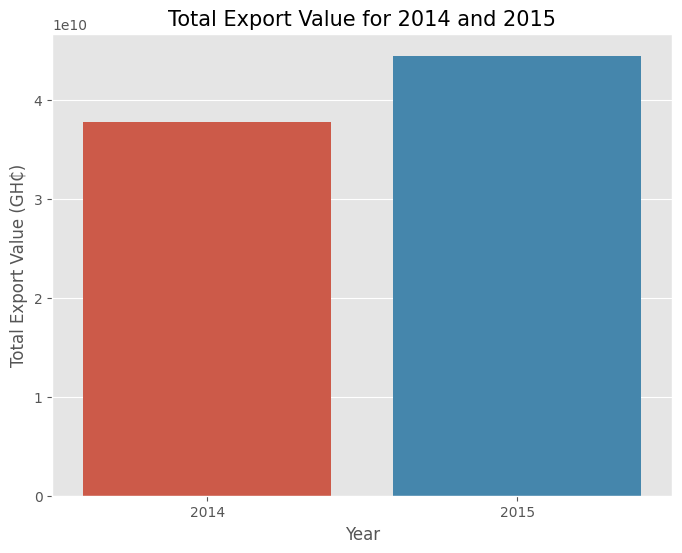

In [34]:
# Data for plotting
data = {'Year': ['2014', '2015'], 'Total Export Value': [total_export_value_2014, total_export_value_2015]}
df_export_values = pd.DataFrame(data)

# Plot
plt.figure(figsize = (8, 6))
sns.barplot(x ="Year", y ="Total Export Value", data = df_export_values)
plt.title('Total Export Value for 2014 and 2015', fontsize = 15)
plt.ylabel('Total Export Value (GH₵)', fontsize = 12)
plt.show()

The bar plot showcases the total export value for the years 2014 and 2015. As depicted by the length of the bars, it is evident that the total export value increased from 2014 to 2015. This indicates a positive shift in the economical standing of the country, potentially marking an improvement in the production capacity, enhancement of quality, or exploitation of new international markets.

Are there new products added to the export list over the years? What are their performances?


In [35]:
# Get unique HS codes and item descriptions for exported commodities in 2014 and 2015
hs_codes_2014 = set(zip(df_export_2014['HS_CODE_EXPORT_2014'], df_export_2014['ITEM_DESCRIPTION_EXPORT_2014']))
hs_codes_2015 = set(zip(df_export_2015['HS_CODE_EXPORT_2015'], df_export_2015['ITEM_DESCRIPTION_EXPORT_2015']))

# Identify new export commodities added in 2015
new_exports = hs_codes_2015 - hs_codes_2014

# Convert new_exports set to a DataFrame
new_exports_df = pd.DataFrame(new_exports, columns=['HS_CODE_EXPORT_2015', 'ITEM_DESCRIPTION_EXPORT_2015'])

# Merge the new exports dataframe with the 2015 export dataframe to get the performance (export volume and total value)
new_export_performance = new_exports_df.merge(df_export_2015, on=['HS_CODE_EXPORT_2015', 'ITEM_DESCRIPTION_EXPORT_2015'])
new_export_performance_grouped = new_export_performance.groupby(['HS_CODE_EXPORT_2015', 'ITEM_DESCRIPTION_EXPORT_2015']).agg({'NETWEIGHT_KGs_EXPORT_2015': 'sum', 'CUSTOM_VALUE_GHS_EXPORT_2015': 'sum'})

# Get top 10 new exported commodities in terms of total export value
top_new_exports = new_export_performance_grouped.sort_values('CUSTOM_VALUE_GHS_EXPORT_2015', ascending = False).head(10)

top_new_exports

,,NETWEIGHT_KGs_EXPORT_2015,CUSTOM_VALUE_GHS_EXPORT_2015
HS_CODE_EXPORT_2015,ITEM_DESCRIPTION_EXPORT_2015,,
8703232050,"Other vehicles, with spark-ignition internal combustion reciprocating piston engine : > 1,900 cc but <= 3,000 cc: Used : of age not more than 10 years",347035.7,512745020.72
3917291000,Of other plastics for water supply,493630.25,252635062.02
3304990000,"Beauty, make-up, skin-care (incl. suntan), nes",1788968.03,226866893.08
8508700090,Parts- Other,175820.96,168220687.76
2710990000,Other waste oils,2493000,144701917.02
3925100000,"Reservoirs... and similar containers, capacity >300 l, of plastics",167892.85,144213902.09
8702901190,"Motor vehicles: Other: New: For 10 to 22 persons, including the driver : Other",584700,84302471.52
2523100000,Cement clinkers,170425726.8,81835538.49
8481300000,Check valves,727.11,74060943.39


In 2015, 38 new commodities were added to the export list. Here is the performance of each of these new commodities, denoted by their HS Code, in terms of their net weight exported and total export value.

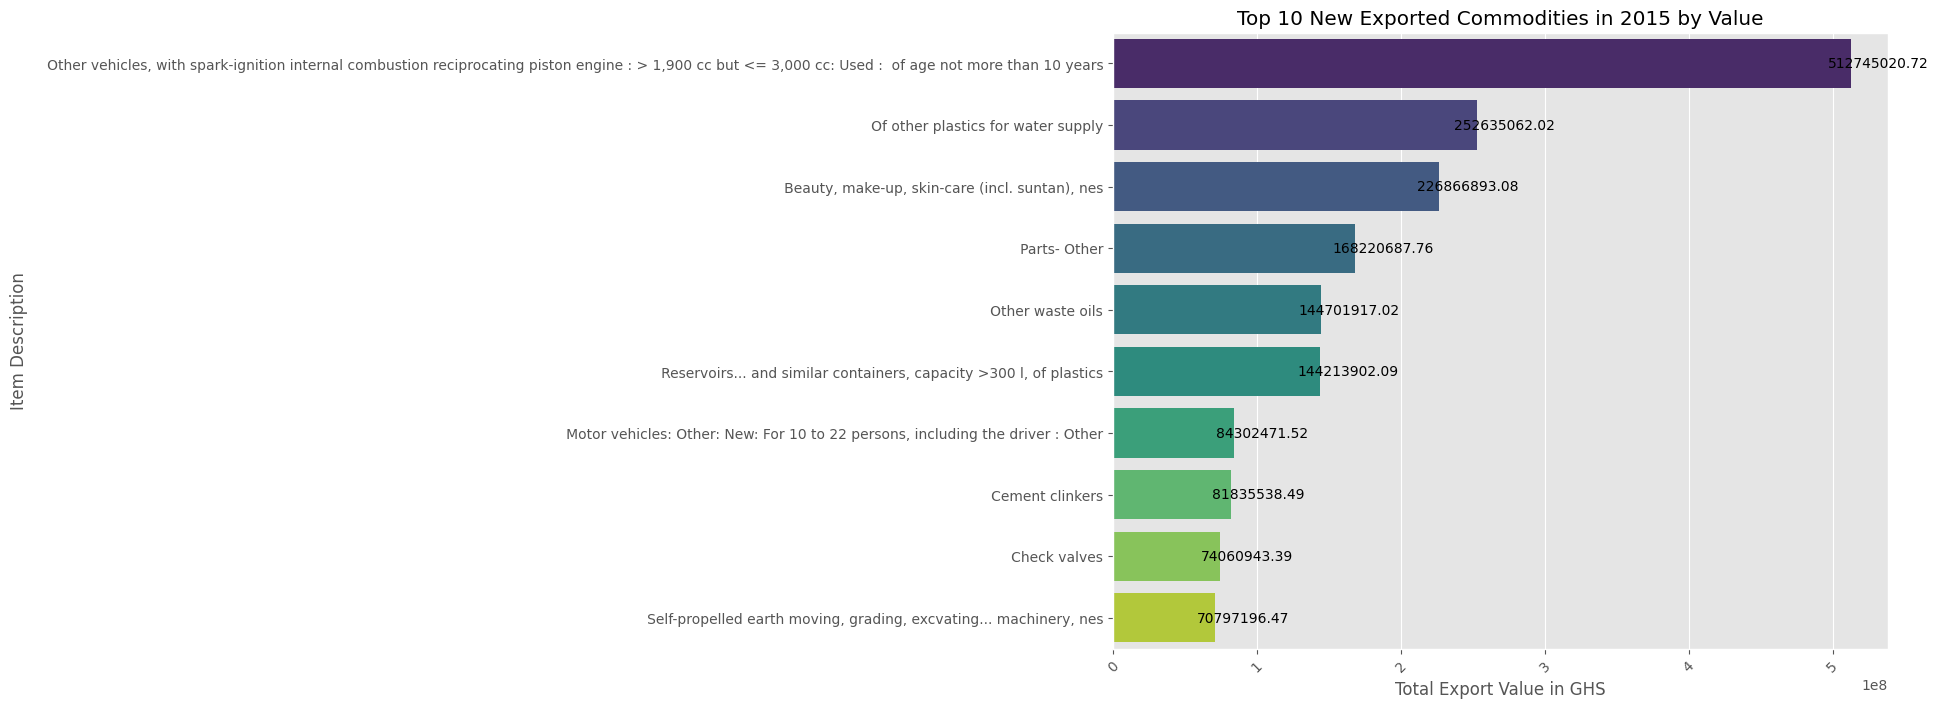

In [36]:

# Convert the index into a column to use for plotting
top_new_exports_reset = top_new_exports.reset_index()

# Create a bar plot using seaborn for better styling
plt.figure(figsize = (10, 8))  # Set the figure size
barplot = sns.barplot(
    x = 'CUSTOM_VALUE_GHS_EXPORT_2015',
    y = 'ITEM_DESCRIPTION_EXPORT_2015',  # Or use 'HS_CODE_EXPORT_2015' if descriptions are too long
    data = top_new_exports_reset,
    palette ='viridis'
)

# Add labels and title for clarity
plt.xlabel('Total Export Value in GHS')
plt.ylabel('Item Description')
plt.title('Top 10 New Exported Commodities in 2015 by Value')
plt.xticks(rotation = 45)  # Rotate the x labels if they overlap

# Annotate the bars with the exact values
for p in barplot.patches:
    barplot.annotate(
        format(p.get_width(), '.2f'),
        (p.get_width(), p.get_y() + p.get_height() / 2.),
        ha = 'center',
        va = 'center',
        xytext = (20, 0),
        textcoords = 'offset points'
    )

plt.show()  # Display the plot
